In [178]:
import numpy as np
import pandas as pd
from ast import literal_eval

data = pd.read_json('recipes_processed_key.json')
recipes = pd.read_csv('recipes_processed_3.csv', converters= {'tags': literal_eval})
print(type(recipes.at[0, 'tags']))

<class 'list'>


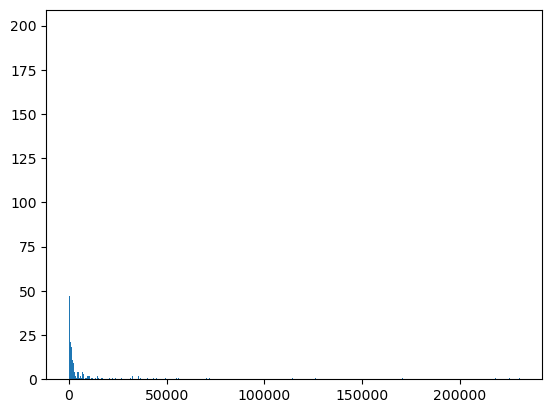

In [103]:
from collections import Counter
import matplotlib.pyplot as plt
all_tags = np.concatenate(recipes['tags'].values)
c = Counter(all_tags)
plt.hist(c.values(), 1000)
plt.savefig('frequency_of_tags')

In [220]:
to_remove = np.array([key for key,value in c.items() if value == 1])

In [222]:
to_remove2 = np.array(data[data['tags'].str.len() > 25].index.tolist())

In [232]:
remove = np.unique(np.concatenate((to_remove, to_remove2)))
print(remove)

[  8  26  32  37  38  43  53  59  62  64  74  76  99 101 102 135 152 153
 159 170 182 190 222 229 235 251 266 269 274 294 296 303 315 323 336 364
 388 389 391 396 408 424 425 451 456 465 466 476 492]


In [240]:
recipes['tags'] = recipes['tags'].apply(lambda x: [i for i in x if i not in remove])

In [246]:
recipes.to_csv('recipes_improved_tags.csv', index = False)